<h1> Install all dependencies <h1>

In [1]:
# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline


In [3]:
# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

In [4]:
# Ici nous définissons une sous-classe de Enum, qui contiendra 
# les stratégies possibles.
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2

In [5]:
# Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # Le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte

In [6]:
seed()
print("Premier nombre aléatoire: {}".format(randint(0,100)))
print("Deuxième nombre aléatoire: {}".format(randint(0,100)))

seed(1)
print("Premier nombre aléatoire: {}".format(randint(0,100)))
print("Deuxième nombre aléatoire: {}".format(randint(0,100)))

seed(1)
# Les deux prochains appels vont retourner le même résultat que les deux précédents
print("Premier nombre aléatoire: {}".format(randint(0,100)))
print("Deuxième nombre aléatoire: {}".format(randint(0,100)))


Premier nombre aléatoire: 57
Deuxième nombre aléatoire: 4
Premier nombre aléatoire: 17
Deuxième nombre aléatoire: 72
Premier nombre aléatoire: 17
Deuxième nombre aléatoire: 72


In [7]:
play_game(Strategie.CHANGER)

True

In [8]:
def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    
    # Ceci est une liste en compréhension. Pour en savoir plus, consulter 
    # le cours "Apprenez à programmer en Python" sur OpenClassrooms
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

In [9]:
print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))

En changeant de porte, le joueur a gagné 6666 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3320 sur 10000 parties.


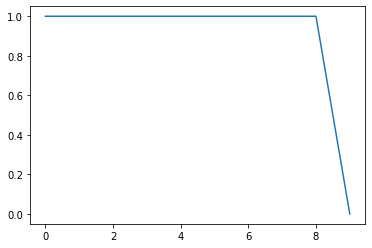

In [10]:
# plot renvoie un objet, que l'on pourra manipuler plus tard pour
# personnaliser le graphique
plot = plt.plot(play(Strategie.CHANGER, 10))

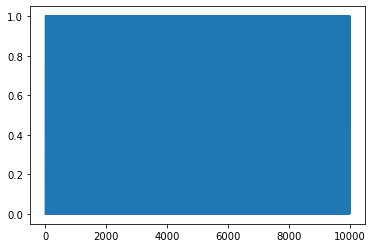

In [11]:
plot = plt.plot(play(Strategie.CHANGER, 10000))

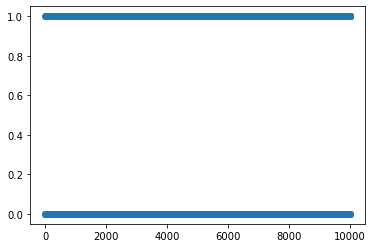

In [12]:
plot = plt.scatter(range(10000), play(Strategie.CHANGER, 10000))
#La fonction  scatter  se comporte comme  plot, mais ne relie pas les points

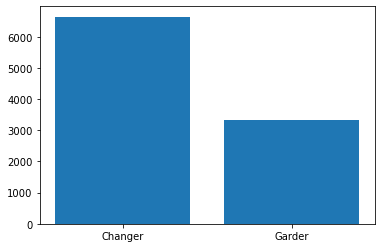

In [13]:
plot = plt.bar([1,2],[sum(play(Strategie.CHANGER, 10000)), 
               sum(play(Strategie.GARDER, 10000))], 
        tick_label=["Changer","Garder"])

In [15]:
gains_changer = []
gains_garder = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))

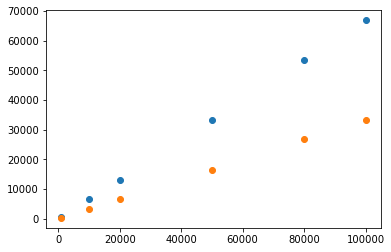

In [16]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])

# la fonction  figure crée un graphique. 
#Les appels suivants aux fonction telles que  scatter  et  plot  génèrent des courbes sur ce même graphique.

Nous pouvons imaginer une autre stratégie, où le joueur choisit aléatoirement une porte entre la première et celle que le présentateur n'a pas éliminée. Implémentez cette stratégie et observez les résultats. Vous devriez trouver que le gain attendu se situe à mi-chemin des gains attendus avec les deux stratégies initiales.